# 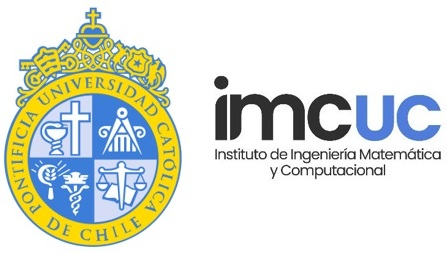  IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2023-1**<br>
**Profesor:** Rodrigo A. Carrasco <br>
---

# <h1><center>Actividad 12: Aprendizaje no supervisado</center></h1>

Esta actividad busca que apliquen algunas de las herramientas de aprendizaje no supervisado que hemos visto.

## Instrucciones

Esto Notebook contiene las instrucciones a realizar para la actividad. 

Al finalizarla, deben subir el Notebook y los archivos generados a su repositorio personal, en una carpeta nueva llamada "Actividad 07". Asegúrese que ambas ayudantes tienen acceso a su repositorio para que puedan corregir. 
    
**La actividad debe ser subida antes del final de la clase. Actualizaciones de su repositorio posteriores a esa fecha serán evaluadas con nota 1.0.**

**Conteste las preguntas en forma precisa y usando celdas de Markdown cuando sea necesario para dejar clara la respuesta.**

## Actividad

Nuevamente, para esta actividad usaremos los mismos datos que usaron en la Interrogación 2, en una base simplificada llamada `oceanData.csv`, que está an la misma carpeta de GitHub que el Notebook de esta actividad. Este archivo CSV resulta de limpir y luego unir las bases `Bottle` y `Cast` como le tocó hacer en la I2.

## Rúbrica

- Si han logrado el punto 1: 3.0
- Si han logrado hasta el punto 2.2: 4.0
- Si han logrado hasta el punto 2.4: 5.0
- Si han logrado todo: 7.0

In [1]:
# librerías necesarias para el ejercicio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Base de datos

### 1.1 Lectura y preparación
El siguiente código abre el archivo `oceanData.csv`, dejando la información en un DataFrame llamado `oceanData` y luego agrega una columna llamada `decada` que suma la década de cada muestra.

Corra la celda para tener el archivo cargado y listo para su trabajo posterior.

In [3]:
# lectura de datos
oceanData = pd.read_csv('oceanData.csv')
# agregar década
oceanData['decada'] = np.floor(oceanData['Year']/10)*10
# mostrar parte del DataFrame
oceanData.head()

,Unnamed: 0,Date,Year,Month,Depthm,T_degC,Salnty,STheta,decada
0,0,3/1/1949,1949,3,0,10.50,33.440,25.649,1940.0
1,1,3/1/1949,1949,3,8,10.46,33.440,25.656,1940.0
2,2,3/1/1949,1949,3,10,10.46,33.437,25.654,1940.0
3,3,3/1/1949,1949,3,19,10.45,33.420,25.643,1940.0
4,4,3/1/1949,1949,3,20,10.45,33.421,25.643,1940.0


### 1.2 Visualización
El siguiente código nos permite visualizar la distribución de valores de cada una de las columnas que nos van a interesar en este trabajo. Corra la siguiente celda para ver los histogramas.

/home/rocky17/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rocky17/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rocky17/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rocky17/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

<Axes: xlabel='decada', ylabel='Count'>

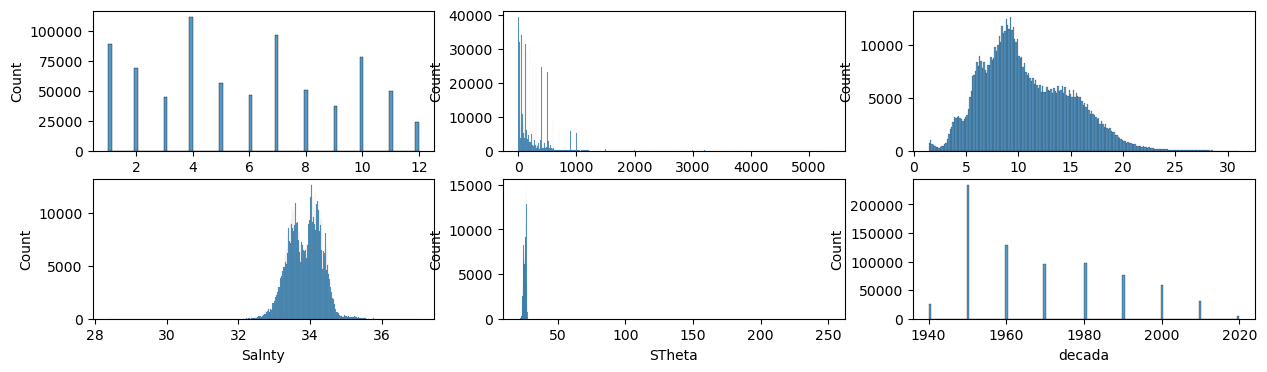

In [4]:
fig,axes = plt.subplots(2, 3, figsize=(15,4))

sns.histplot(data=oceanData, x='Month', ax=axes[0, 0])
sns.histplot(data=oceanData, x='Depthm', ax=axes[0, 1])
sns.histplot(data=oceanData, x='T_degC', ax=axes[0, 2])
sns.histplot(data=oceanData, x='Salnty', ax=axes[1, 0])
sns.histplot(data=oceanData, x='STheta', ax=axes[1, 1])
sns.histplot(data=oceanData, x='decada', ax=axes[1, 2])

## 2. Agrupaciones

En este ejercicio queremos ver si las muestras pueden ser clasificadas en algunos grupos generales que se diferencian entre sí. Para ello usaremos herramientas de aprendizaje no supervisado, en particular, clustering.

### 2.1 Escalamiento
El primer paso es escalar los datos. Para ello corra la siguiente celda que escala cada una de las columnas que usaremos. Posteriormente haga un histograma de cada columna para ver cómo quedaron los datos.

Luego repita los histogramas anteriores pero con los datos escalados para visualizar el efecto del escalamiento.

In [5]:
# libreria necesaria
from sklearn.preprocessing import StandardScaler

# escalamiento
scaler=StandardScaler()
oceanData_sc=scaler.fit_transform(oceanData[['Month', 'Depthm', 'T_degC', 'Salnty', 'STheta', 'decada']])
oceanData_sc

array([[-0.86313334, -0.74092351, -0.06288519, -0.91472405, -0.16853204,
        -1.47866522],
       [-0.86313334, -0.71476789, -0.07234434, -0.91472405, -0.16257259,
        -1.47866522],
       [-0.86313334, -0.70822898, -0.07234434, -0.92126586, -0.16427529,
        -1.47866522],
       ...,
       [ 1.25839152, -0.72457625,  2.37851997, -0.50804194, -1.99990485,
         2.6464551 ],
       [ 1.25839152, -0.70822898,  1.7889788 , -0.75488599, -1.52612863,
         2.6464551 ],
       [ 1.25839152, -0.70495953,  1.604289  , -0.79195621, -1.37527795,
         2.6464551 ]])

In [9]:
df_oceanData_sc = pd.DataFrame(oceanData_sc, columns=['Month', 'Depthm', 'T_degC', 'Salnty', 'STheta', 'decada'])

/home/rocky17/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rocky17/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rocky17/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rocky17/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

<Axes: xlabel='decada', ylabel='Count'>

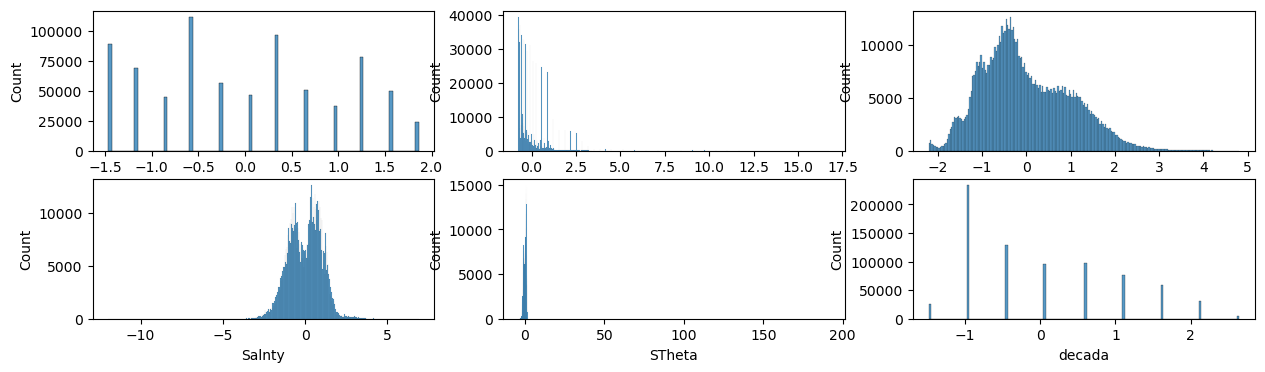

In [14]:
fig,axes = plt.subplots(2, 3, figsize=(15,4))

sns.histplot(data=df_oceanData_sc, x='Month', ax=axes[0, 0])
sns.histplot(data=df_oceanData_sc, x='Depthm', ax=axes[0, 1])
sns.histplot(data=df_oceanData_sc, x='T_degC', ax=axes[0, 2])
sns.histplot(data=df_oceanData_sc, x='Salnty', ax=axes[1, 0])
sns.histplot(data=df_oceanData_sc, x='STheta', ax=axes[1, 1])
sns.histplot(data=df_oceanData_sc, x='decada', ax=axes[1, 2])

### 2.2 Clustering
En la siguiente celda use el algoritmo k-means para armar 3 clusters con los datos escalados. En la celda ya está parte del código que necesitan para ello.

Almacene su modelo en una variable llamada `clusters`.

In [19]:
from sklearn.cluster import KMeans

#número predefinido de clusters
nclusters = 3

# Inicializamos la instancia  KMeans 
kmeans = KMeans(n_clusters=nclusters, n_init='auto')

# continue usted con el código para segmentar los datos
clusters = kmeans.fit(df_oceanData_sc)

La siguiente celda agrega una etiqueta a cada punto según el cluster asignado. Corra la celda para tener esa etiqueta en sus datos originales.

In [20]:
# agregar etiquetas
labels = kmeans.predict(oceanData_sc)
oceanData['cluster_labels'] = labels
oceanData.sample(10)

/home/rocky17/miniconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


,Unnamed: 0,Date,Year,Month,Depthm,T_degC,Salnty,STheta,decada,cluster_labels
174788,174788,2/16/1956,1956,2,20,15.42,33.502,24.727,1950.0,2
190024,190024,4/20/1957,1957,4,75,12.10,33.412,25.339,1950.0,2
572035,572035,9/22/1988,1988,9,20,18.22,33.569,24.122,1980.0,2
113424,113424,4/9/1953,1953,4,10,15.81,33.870,24.923,1950.0,2
508882,508882,3/5/1984,1984,3,334,6.50,34.208,26.866,1980.0,1
718486,718486,11/6/2007,2007,11,124,11.79,33.315,25.323,2000.0,2
405798,405798,4/19/1972,1972,4,700,4.55,34.283,27.163,1970.0,0
259485,259485,12/13/1959,1959,12,30,17.29,33.694,24.446,1950.0,2
329158,329158,2/20/1964,1964,2,20,16.35,33.720,24.685,1960.0,2
250638,250638,8/16/1959,1959,8,482,5.72,34.210,26.969,1950.0,0


### 2.3 Evaluación
Indique el valor de la métrica de inercia de su modelo

In [21]:
# mostrar inercia
kmeans.inertia_

2655841.1303445683

### 2.4 Visualización
Haga un único scater plot de temperatura vs salinidad, dejando de un color diferente cada muestra según el cluster al que fue asignado.

/home/rocky17/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rocky17/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rocky17/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='T_degC', ylabel='Salnty'>

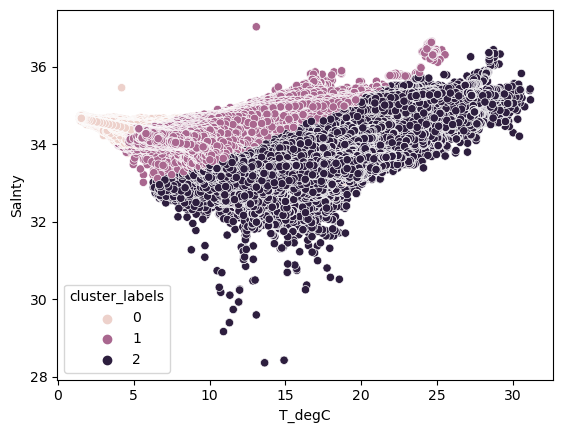

In [22]:
# incorpore el gráfico

sns.scatterplot(data=oceanData, x='T_degC', y='Salnty', hue='cluster_labels')

## 3. Seleccionando `n`

Repita el ejercicio de clustering anterior para valores de `n` desde 1 hasta 20. Haga un gráfico con el valor de la inercia de su modelo para cada valor de `n`. ¿Cuál `n` eligiría para la agrupación de muestras?

In [27]:
# desarrollo de los modelos

n = range(1, 21)
inercia = []

for k in n:
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(df_oceanData_sc)
    inercia.append(kmeans.inertia_)


/home/rocky17/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rocky17/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rocky17/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rocky17/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

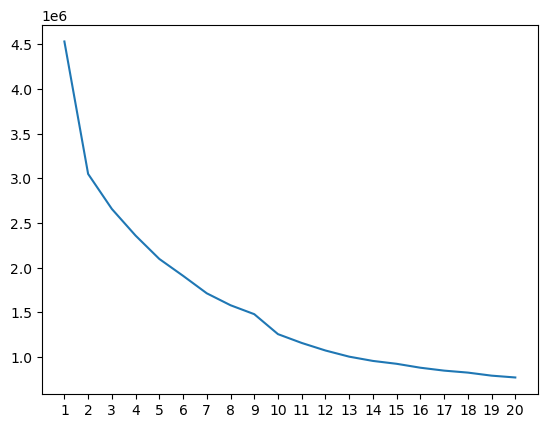

In [28]:
# grafico

import matplotlib.ticker as ticker # Sugerencia de chatgpt para que se vea mejor el gráfico

ax = sns.lineplot(x=range(1, 21), y=inercia)
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax.set_xticks(range(1, 21)) 

Un valor muy alto de n, hace que la inercia se minimice, pero no necesariamente es el mejor valor de n, ya que va hacer que el modelo se sobreajuste y no lleguemos a ver una buena agrupacion de los datos.

/home/rocky17/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rocky17/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rocky17/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='T_degC', ylabel='Salnty'>

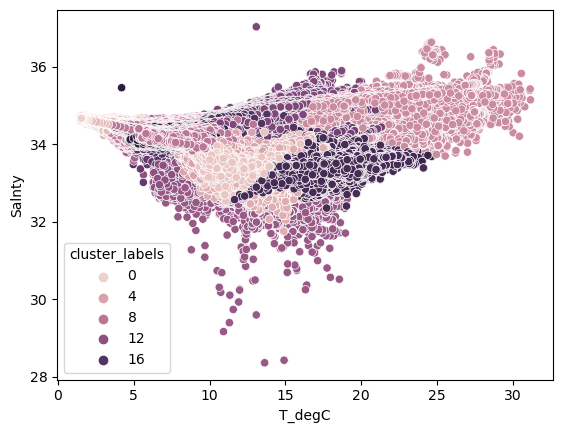

In [30]:
k = 20
kmeans = KMeans(n_clusters=k, n_init='auto')
kmeans.fit(df_oceanData_sc)
labels = kmeans.predict(df_oceanData_sc)

oceanData['cluster_labels'] = labels

# grafico
sns.scatterplot(data=oceanData, x='T_degC', y='Salnty', hue='cluster_labels')

Ahi podemos ver que hay muchisimos grupos, y no es muy claro lo que expresa, por lo que un buen valor que se puede elegir es 3, ya que es un valor que no es muy alto, y se puede ver una buena agrupacion de los datos (grafico anterior).

## Última parte: apoyo a la licenciatura

Ahora que ha terminado la Actividad, les agradeceríamos visitar https://cursos.canvas.uc.cl/courses/63834 y contestar la encuesta docente. Es una herramienta muy útil para nosotros pues nos permite fortalecer el programa de Licenciatura y apoyar el desarrollo de los Científicos/as de Datos que egresarán del IMC.

Muchas gracias.